# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

In [ ]:
# Ваш ответ здесь

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

In [ ]:
# Ваш ответ здесь

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

In [ ]:
# Ваш ответ здесь

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [10]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
columns = ('buying maint doors persons lug_boot safety target')
df.columns = columns.split()

In [30]:
from sklearn import preprocessing, model_selection
from sklearn.utils import shuffle
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
data = shuffle(encoded_data.values)
# Get Data
test_size = 0.3
train , test = model_selection.train_test_split(data, test_size = test_size)

X_test, y_test = test[:,:-1], test[:,-1]
X_train, y_train = train[:,:-1], train[:,-1]

In [31]:
from sklearn import metrics
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.9633911368015414

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [32]:
import IPython.display #needed to render in notebook
from io import StringIO #needed to render in notebook
import pydotplus  #needed to convert dot format to png
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)

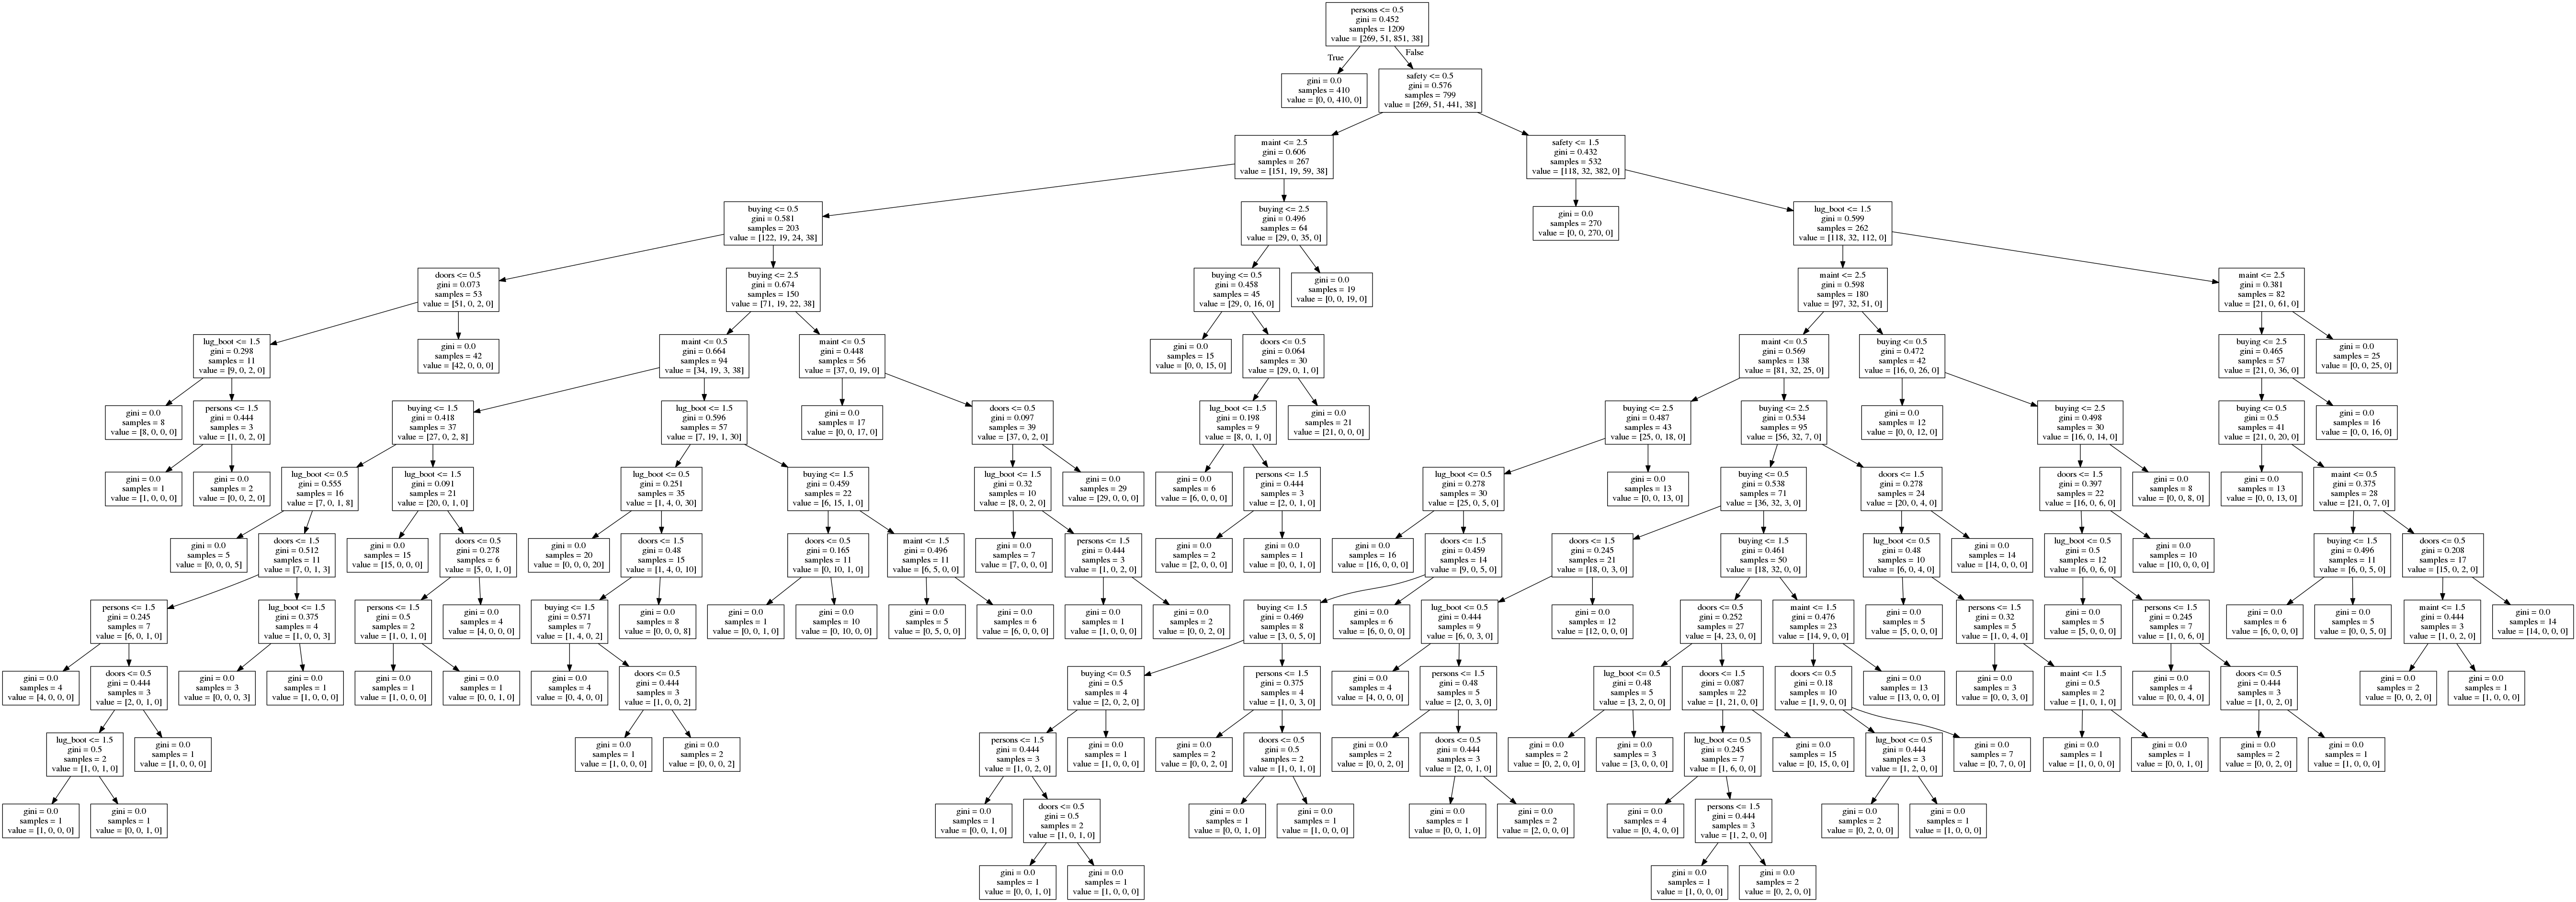

In [33]:
draw_decision_tree(clf, df.columns[:-1])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

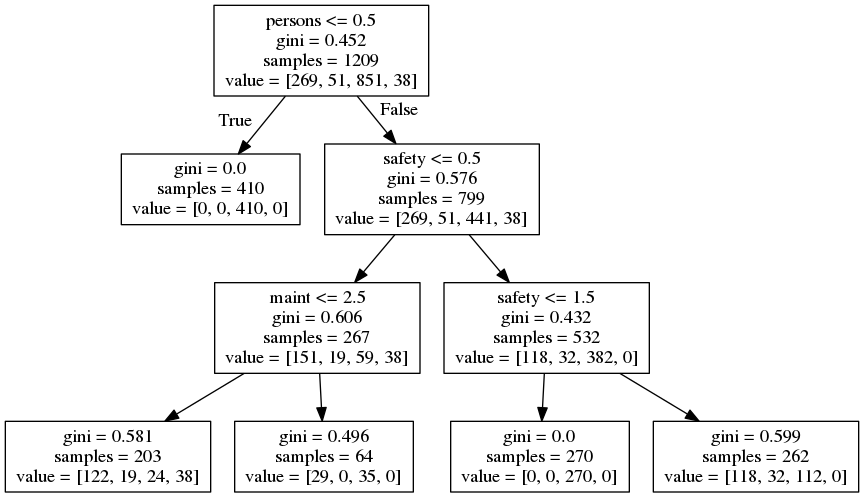

Точность на тесте:  0.7572254335260116
Точность на обучении:  0.7899090157154673


In [38]:
"max_depth = 3"
clf = DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

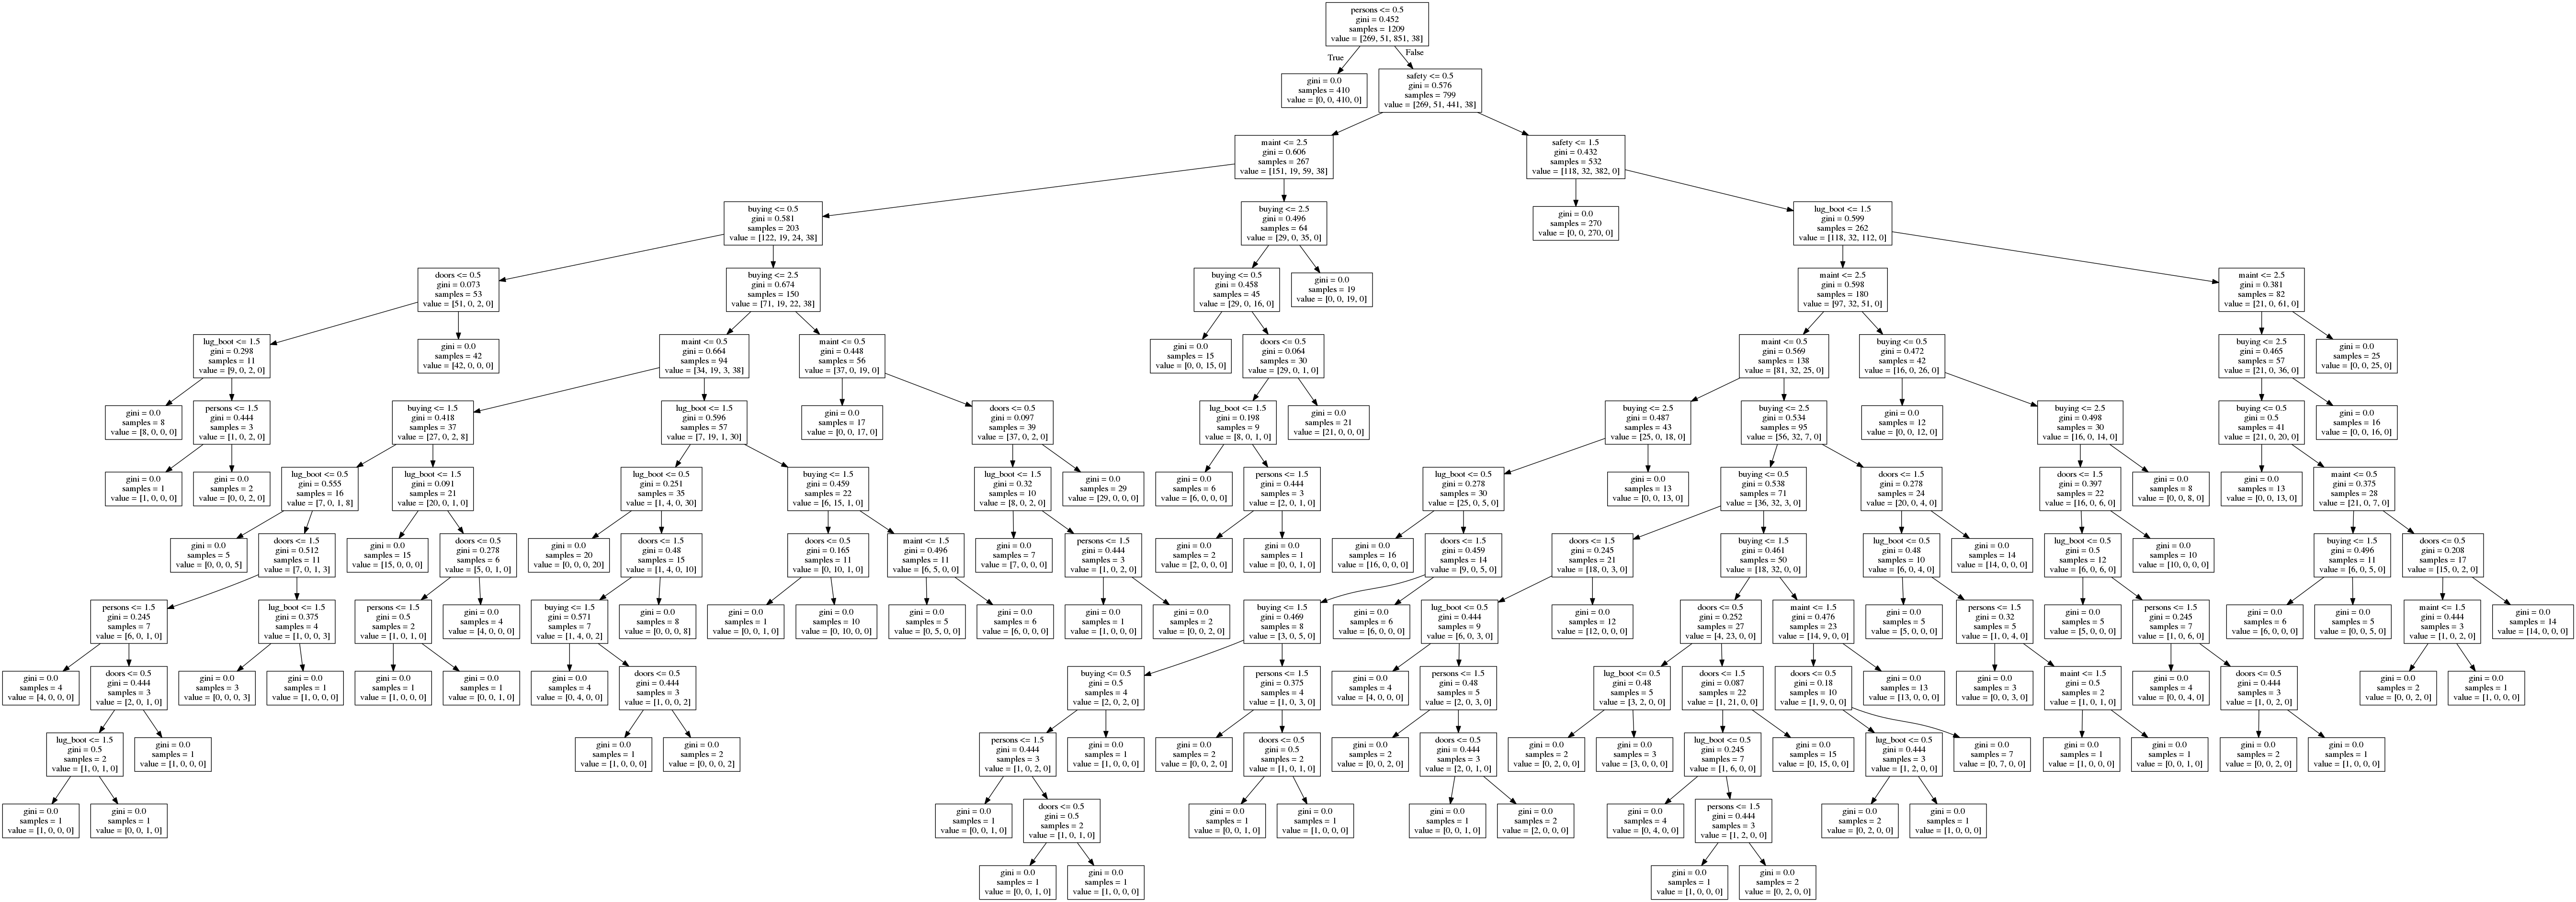

Точность на тесте:  0.9633911368015414
Точность на обучении:  1.0


In [39]:
"max_depth = 30"
clf = DecisionTreeClassifier(random_state=1, max_depth=30)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

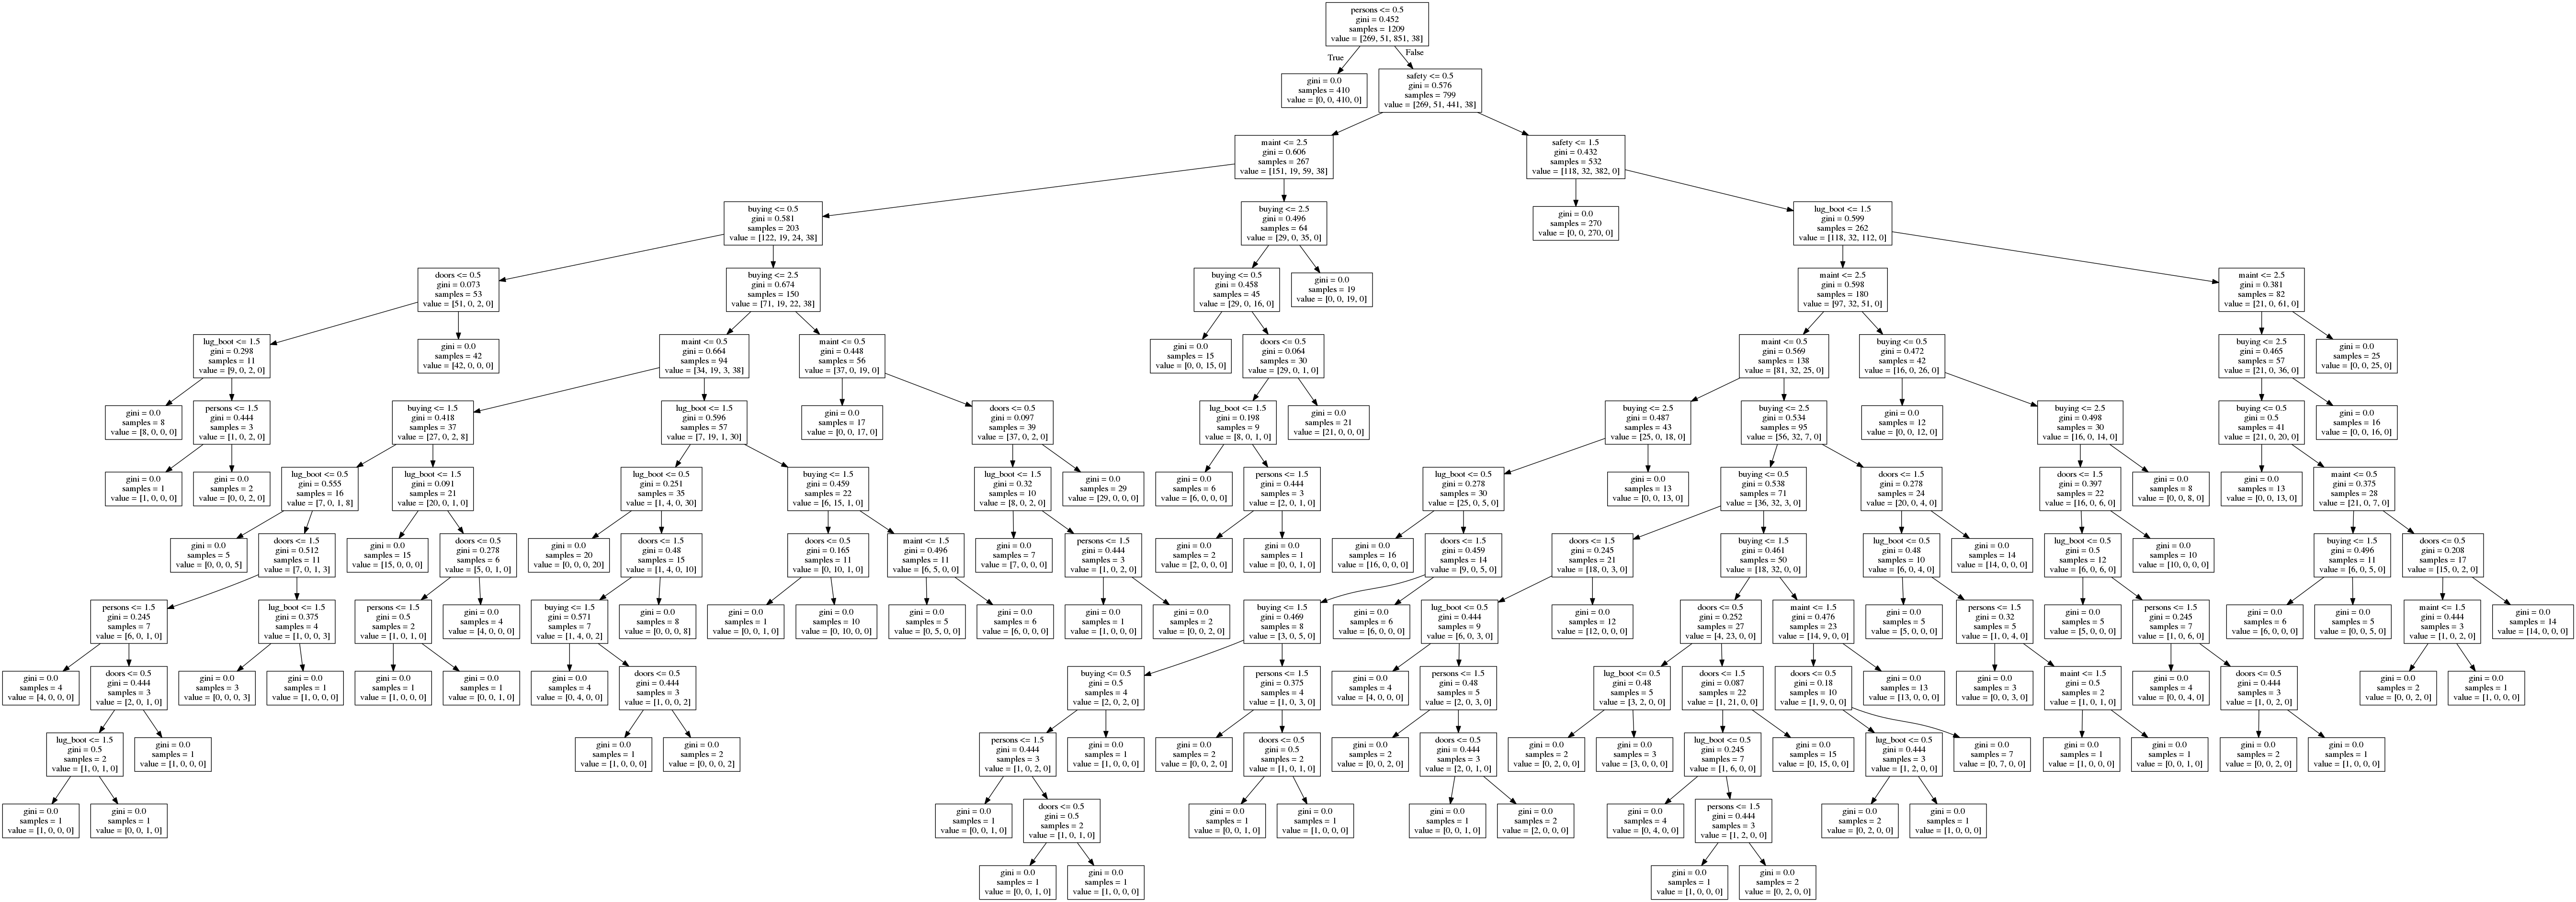

Точность на тесте:  0.9633911368015414
Точность на обучении:  1.0


In [40]:
"criterion = gini"
clf = DecisionTreeClassifier(random_state=1, criterion="gini")
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

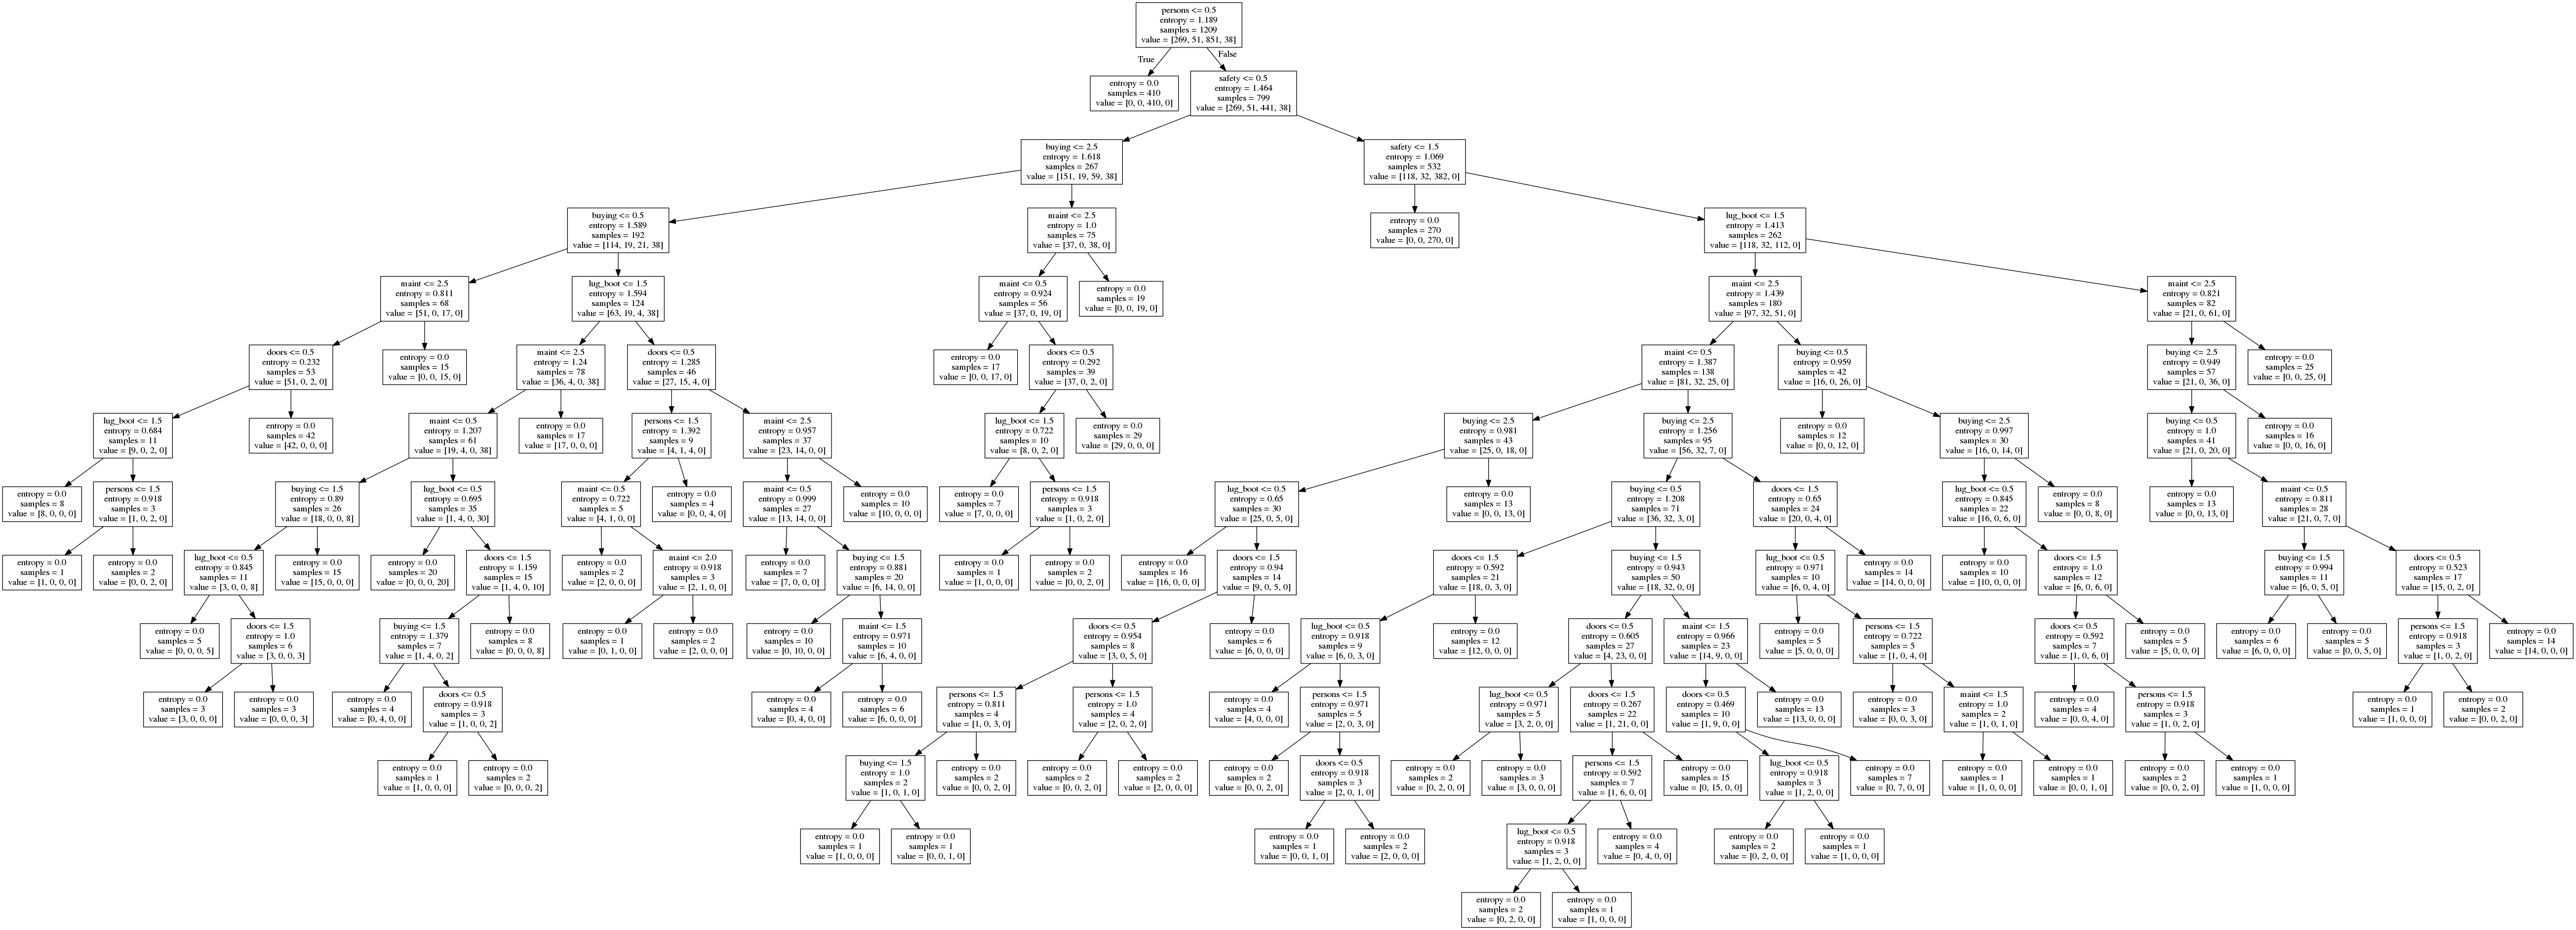

Точность на тесте:  0.9710982658959537
Точность на обучении:  1.0


In [42]:
"criterion = entropy"
clf = DecisionTreeClassifier(random_state=1, criterion="entropy")
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

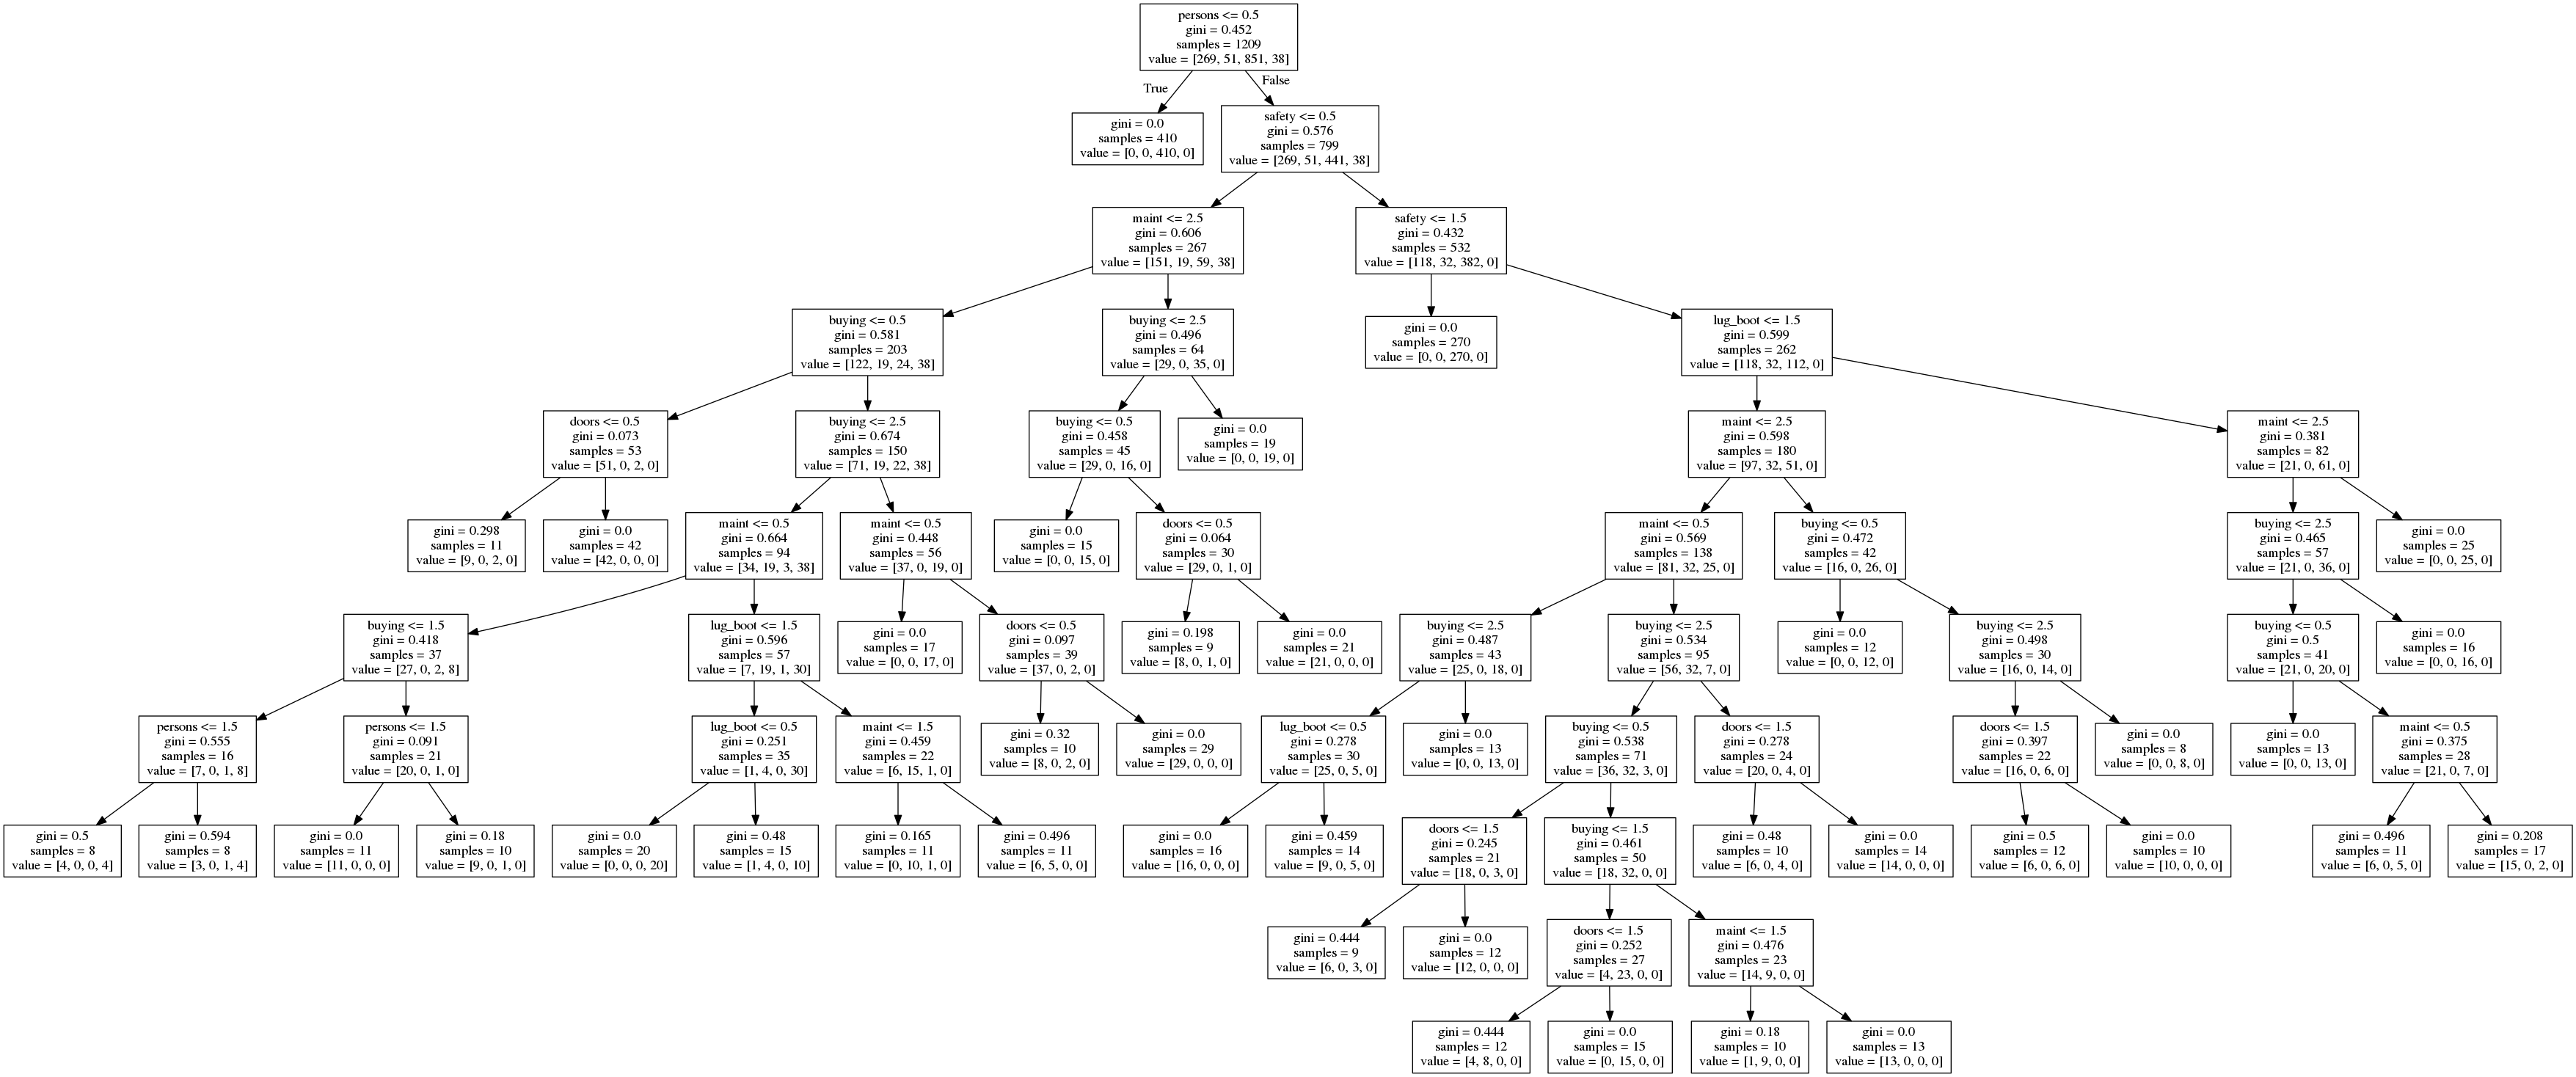

Точность на тесте:  0.9364161849710982
Точность на обучении:  0.9545078577336642


In [48]:
"min_samples_leaf = 8"
clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=8)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

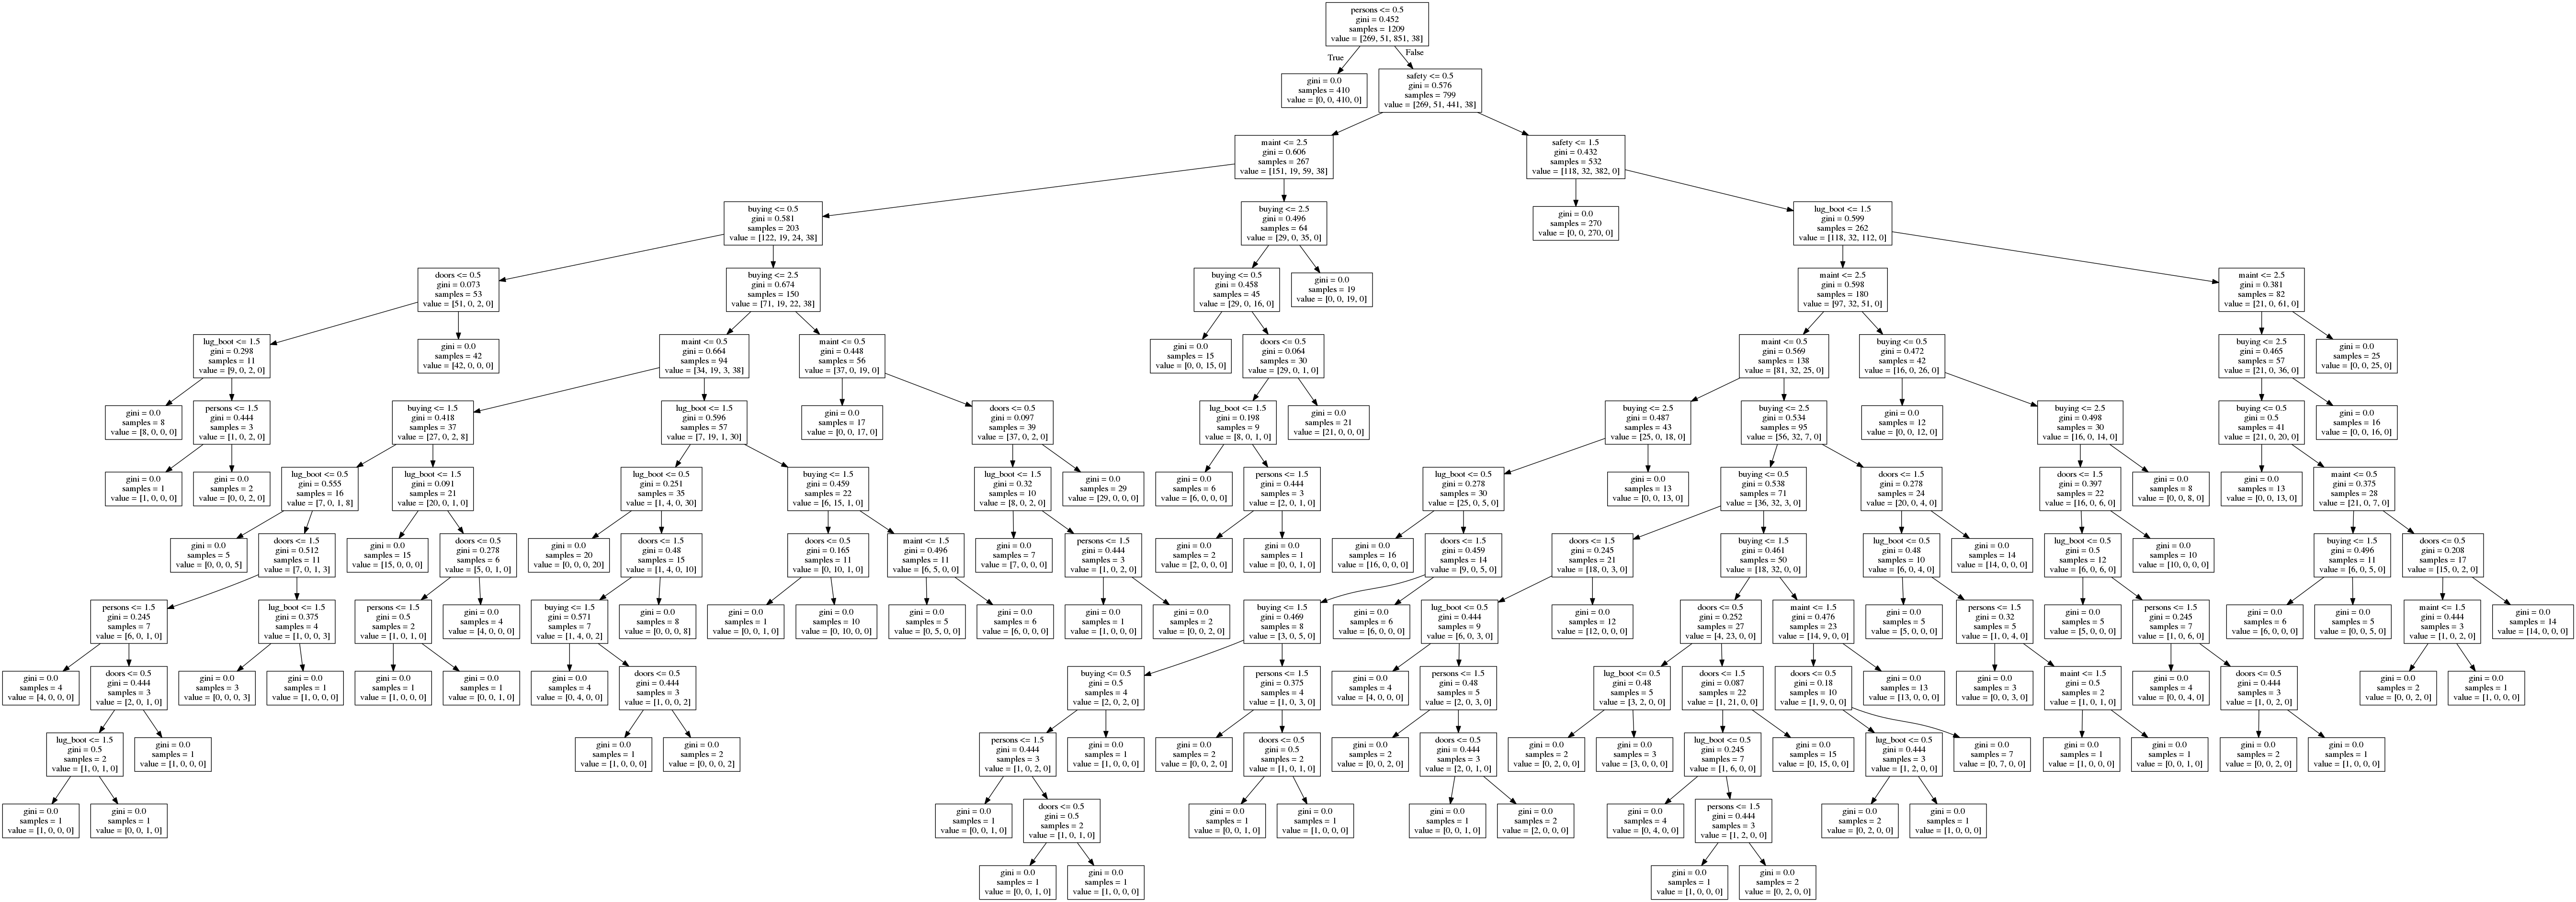

Точность на тесте:  0.9633911368015414
Точность на обучении:  1.0


In [44]:
"min_samples_leaf = 1"
clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=1)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

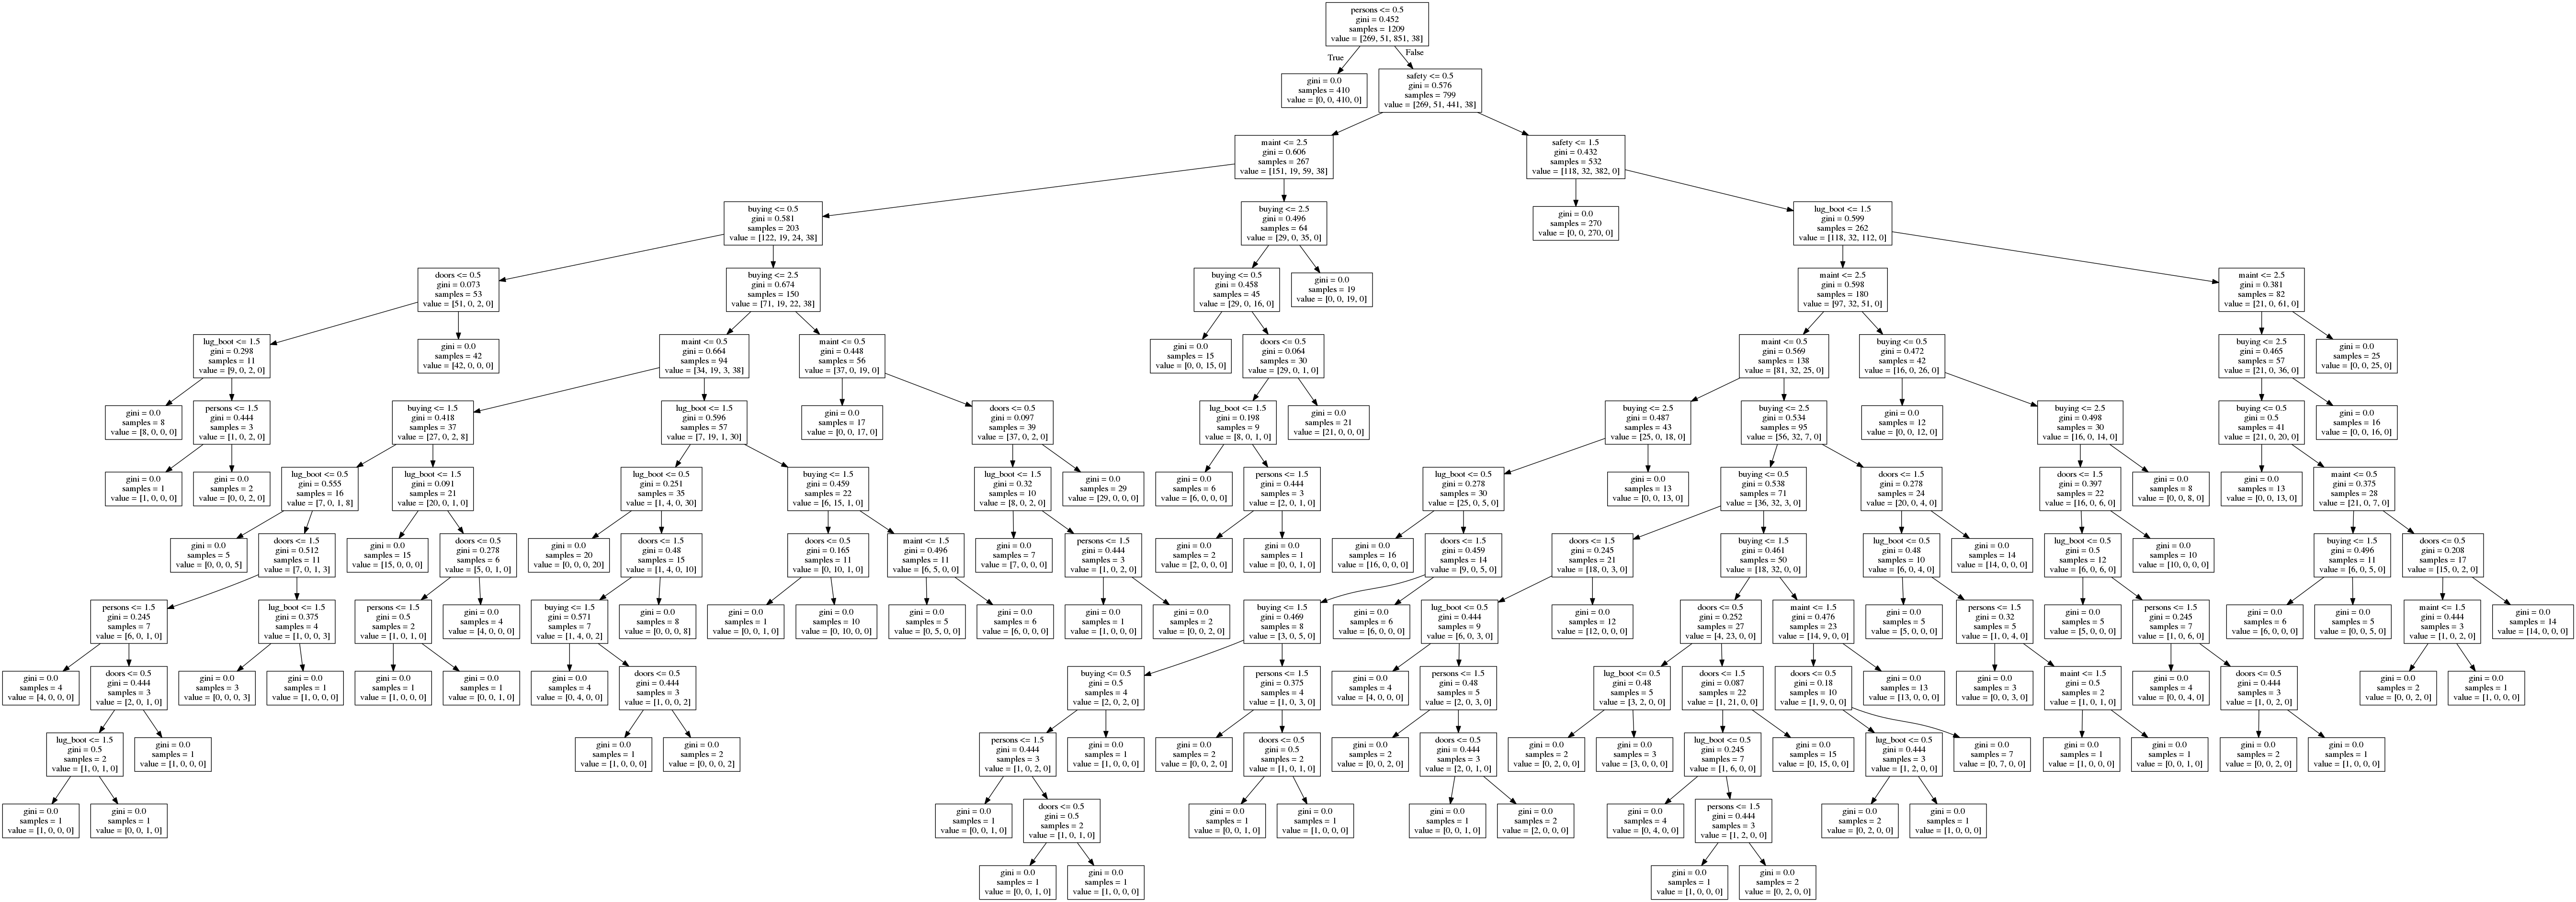

Точность на тесте:  0.9633911368015414
Точность на обучении:  1.0


In [49]:
"max_features = n_features (None)"
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

In [50]:
"max_features = 0.1"
clf = DecisionTreeClassifier(random_state=1, max_features=0.1)
clf.fit(X_train, y_train)
draw_decision_tree(clf, df.columns[:-1])
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

Точность на тесте:  0.8131021194605009
Точность на обучении:  1.0


## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [78]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [79]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [207]:
def entropy(y):  
    p = np.bincount(y) / y.shape[0]
    p = np.array(list(filter(None, p)))
    return (-1) * np.sum(p * np.log2(p))

def gini(y):
    p = np.bincount(y) / y.shape[0]
    p = np.array(list(filter(None, p)))
    return 1 - np.sum(p**2)

def variance(y):
    y = np.array(y)
    return np.var(y)

def mad_median(y):
    y = np.array(y)
    return np.mean(np.absolute(y - np.median(y)))

In [256]:
class Tree:
    def __init__(self, j=None, t=None, left=None, right=None, y=None):
        self.left = left
        self.right = right
        self.j = j
        self.t = t
        
def get_Q(F, y, y_l, y_r):
    return F(y) - y_l.shape[0] / y.shape[0] * F(y_l) - y_r.shape[0] / y.shape[0] * F(y_r)
        
class DecisionTree(BaseEstimator):
    
    def __init__(self, problem, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.debug = debug
        self.problem = problem
        self.tree = Tree()
    
    def fit(self, X, y):
        if self.problem=="regression":
            self.__fit_regression(X, y, self.tree, 0)
        if self.problem=="classification":
            self.K = list(set(y))
            self.__fit_classification(X, y, self.tree, 0)
        return self
    
    def __fit_classification(self, X, y, tree, h):  # h - глубина дерева
        tree.y = y
        # критерий останова
        if (h >= self.max_depth or X.shape[0] < self.min_samples_split):
            return None
        # находим Q_max
        Q_max = -1 * 10**10
        j_opt = 0
        t_opt = 0
        for j in range(X.shape[1]): # перебор по всем признакам
            # выбираем пороги так чтобы разбить выборку
            T = list(set(X[:,j]))
            if np.size(T) == 1:
                continue
            for t in T[1:]:
                ind_X_l = []
                ind_X_r = []
                for ind in range(X.shape[0]):
                    if (X[ind,j] < t):
                        ind_X_l.append(ind)
                    else:
                        ind_X_r.append(ind)
                Q = 0
                if self.criterion == "gini":
                    Q = get_Q(gini, y, y[ind_X_l], y[ind_X_r])
                if self.criterion == "entropy":
                    Q = get_Q(entropy, y, y[ind_X_l], y[ind_X_r])
                if (Q > Q_max):
                    Q_max = Q
                    j_opt = j
                    t_opt = t
        if Q_max == 0:  # если не получилось разбить выборку
            return None
        # разбиваем дерево на два поддерева, знаю t, j
        ind_X_l = []
        ind_X_r = []
        for ind in range(X.shape[0]):
            if (X[ind,j_opt] < t_opt):
                ind_X_l.append(ind)
            else:
                ind_X_r.append(ind)
        tree.j = j_opt
        tree.t = t_opt
        tree.left = Tree()
        tree.right = Tree()
        self.__fit_classification(X[ind_X_l], y[ind_X_l], tree.left, h + 1)
        self.__fit_classification(X[ind_X_r], y[ind_X_r], tree.right, h + 1)

    def __fit_regression(self, X, y, tree, h):  # h глубина дерева
        tree.y = y
        # критерий останова
        if (h >= self.max_depth or X.shape[0] < self.min_samples_split):
            return None
        # находим Q_max
        Q_max = -1 * 10**10
        j_opt = 0
        t_opt = 0
        for j in range(X.shape[1]): # перебор по всем признакам
            # выбираем пороги так чтобы разбить выборку
            T = np.random.choice(X[:,j], size=int(X.shape[0]*0.1) + 1, replace=False)
            for t in T:
                ind_X_l = []
                ind_X_r = []
                for ind in range(X.shape[0]):
                    if (X[ind,j] < t):
                        ind_X_l.append(ind)
                    else:
                        ind_X_r.append(ind)
                if (np.size(ind_X_l) == 0 or np.size(ind_X_r) == 0):
                    continue
                Q = 0
                if self.criterion == "variance":
                    Q = get_Q(variance, y, y[ind_X_l], y[ind_X_r])
                if self.criterion == "mad_median":
                    Q = get_Q(mad_median, y, y[ind_X_l], y[ind_X_r])
                if (Q > Q_max):
                    Q_max = Q
                    j_opt = j
                    t_opt = t
        if Q_max == 0 or Q_max == -1 * 10**10:  # если не получилось разбить выборку
            return None
        # разбиваем дерево на два поддерева, знаю t, j
        ind_X_l = []
        ind_X_r = []
        for ind in range(X.shape[0]):
            if (X[ind,j_opt] < t_opt):
                ind_X_l.append(ind)
            else:
                ind_X_r.append(ind)
        tree.j = j_opt
        tree.t = t_opt
        tree.left = Tree()
        tree.right = Tree()
        self.__fit_regression(X[ind_X_l], y[ind_X_l], tree.left, h + 1)
        self.__fit_regression(X[ind_X_r], y[ind_X_r], tree.right, h + 1)
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        if self.problem=="regression":
            for i in range(X.shape[0]):
                tree = self.tree
                while (tree.left != None and tree.right != None):
                    if (X[i, tree.j] < tree.t):
                        tree = tree.left
                    else:
                        tree = tree.right
                y[i] = np.mean(tree.y)
        if self.problem=="classification":
            for i in range(X.shape[0]):
                tree = self.tree
                while (tree.left != None and tree.right != None):
                    if (X[i, tree.j] < tree.t):
                        tree = tree.left
                    else:
                        tree = tree.right
                #y[i] = np.argmax(np.bincount(tree.y))
                y[i] = self.K[np.argmax([list(tree.y).count(k) for k in self.K])]
        return y
        
    def predict_proba(self, X):
        p = np.ndarray((X.shape[0],np.size(self.K)))
        if self.problem=="regression":
            pass
        if self.problem=="classification":
            for i in range(X.shape[0]):
                tree = self.tree
                while (tree.left != None and tree.right != None):
                    if (X[i, tree.j] < tree.t):
                        tree = tree.left
                    else:
                        tree = tree.right
                p[i] = np.array([list(tree.y).count(k) for k in self.K])/np.size(tree.y)
        return p

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [105]:
digits = load_digits()
test_size = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = test_size, random_state = RANDOM_STATE)

In [205]:
clf = DecisionTree(problem="classification", max_depth=3, criterion='gini')
clf.fit(X_train, y_train)
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

Точность на тесте:  0.8583333333333333
Точность на обучении:  1.0


In [208]:
clf = DecisionTree(problem="classification", max_depth=3, criterion='entropy')
clf.fit(X_train, y_train)
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

Точность на тесте:  0.8861111111111111
Точность на обучении:  1.0


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [157]:
from sklearn import cross_validation, grid_search
classifier = DecisionTree(problem='classification')
parameters_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(3,11)),
}
cv = cross_validation.StratifiedShuffleSplit(digits.target, n_iter = 5, test_size = test_size, random_state = RANDOM_STATE)
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)

In [158]:
%%time
grid_cv.fit(digits.data, digits.target)

CPU times: user 19min 10s, sys: 5.63 s, total: 19min 16s
Wall time: 19min 9s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 1 ... 9 8], n_iter=5, test_size=0.2, random_state=42),
       error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=False, max_depth=inf,
       min_samples_split=2, problem='classification'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [159]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8627777777777778
{'criterion': 'entropy', 'max_depth': 9}


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

Populating the interactive namespace from numpy and matplotlib


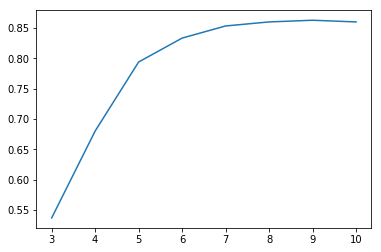

In [191]:
import matplotlib.pyplot as plt
%pylab inline
"criterion=entropy"
scores = []
for x in grid_cv.grid_scores_:
    if (x.parameters['criterion']=='entropy'):
        scores.append(x.mean_validation_score)
plt.plot(parameters_grid['max_depth'], scores)

Populating the interactive namespace from numpy and matplotlib


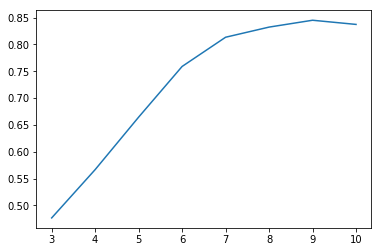

In [192]:
import matplotlib.pyplot as plt
%pylab inline
"criterion=gini"
scores = []
for x in grid_cv.grid_scores_:
    if (x.parameters['criterion']=='gini'):
        scores.append(x.mean_validation_score)
plt.plot(parameters_grid['max_depth'], scores)

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

## !!!!Написать анализ полученных графиков

In [193]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8627777777777778
{'criterion': 'entropy', 'max_depth': 9}


Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [209]:
clf = DecisionTree(problem="classification", max_depth=9, criterion='entropy')
clf.fit(X_train, y_train)
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Вероятности принадлежности к классам: ", clf.predict_proba(X_test))

Точность на тесте:  0.8861111111111111
Вероятности принадлежности к классам:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

Чему примерно равна максимальная вероятность в полученном векторе?

In [214]:
print(np.mean(clf.predict_proba(X_test), axis=0))
print("Максимальная вероятность равна ", np.max(np.mean(clf.predict_proba(X_test), axis=0)))

[0.08673533 0.09206349 0.07857143 0.09166667 0.12222222 0.13888889
 0.1031746  0.10277778 0.08112181 0.10277778]
Максимальная вероятность равна  0.1388888888888889


In [215]:
"Реальное распределение классов в тестовой выборке"
K = list(set(y_test))
print(np.array([list(y_test).count(k) for k in K])/np.size(y_test))

[0.09166667 0.07777778 0.09166667 0.09444444 0.12777778 0.13055556
 0.09722222 0.09444444 0.08333333 0.11111111]


### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [231]:
boston = load_boston()
test_size = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size = test_size, random_state = RANDOM_STATE)

In [257]:
clf = DecisionTree(problem="regression", max_depth=3, criterion='variance')
clf.fit(X_train, y_train)
print("MES на тесте: ", metrics.mean_squared_error(y_test, clf.predict(X_test)))
print("MES на обучении: ", metrics.mean_squared_error(y_train, clf.predict(X_train)))

Точность на тесте:  22.705212972300682
Точность на обучении:  19.15127466191083


In [258]:
clf = DecisionTree(problem="regression", max_depth=3, criterion='mad_median')
clf.fit(X_train, y_train)
print("MES на тесте: ", metrics.mean_squared_error(y_test, clf.predict(X_test)))
print("MES на обучении: ", metrics.mean_squared_error(y_train, clf.predict(X_train)))

MES на тесте:  21.258788776998983
MES на обучении:  21.3467782420492


С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [268]:
from sklearn import cross_validation, grid_search
classifier = DecisionTree(problem='regression')
parameters_grid = {
    'criterion' : ['variance', 'mad_median'],
    'max_depth' : list(range(2,9)),
}
cv = cross_validation.KFold(np.size(boston.target), n_folds = 5, shuffle=True, random_state = RANDOM_STATE)
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'neg_mean_squared_error', cv = cv)

In [269]:
%%time
grid_cv.fit(boston.data, boston.target)

CPU times: user 2min 17s, sys: 188 ms, total: 2min 18s
Wall time: 2min 18s


GridSearchCV(cv=sklearn.cross_validation.KFold(n=506, n_folds=5, shuffle=True, random_state=42),
       error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=False, max_depth=inf,
       min_samples_split=2, problem='regression'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['variance', 'mad_median'], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [270]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-16.77721911804364
{'criterion': 'variance', 'max_depth': 7}


Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

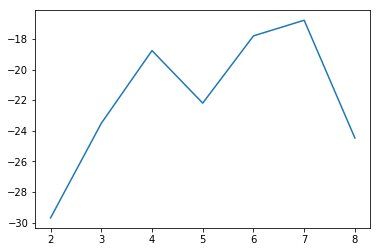

In [273]:
import matplotlib.pyplot as plt
"criterion=variance"
scores = []
for x in grid_cv.grid_scores_:
    if (x.parameters['criterion']=='variance'):
        scores.append(x.mean_validation_score)
plt.plot(parameters_grid['max_depth'], scores)

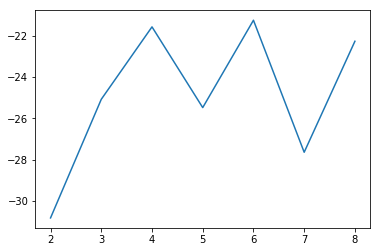

In [274]:
"criterion=mad_median"
scores = []
for x in grid_cv.grid_scores_:
    if (x.parameters['criterion']=='mad_median'):
        scores.append(x.mean_validation_score)
plt.plot(parameters_grid['max_depth'], scores)

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

## !!!!Написать анализ полученных графиков

In [276]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-16.77721911804364
{'criterion': 'variance', 'max_depth': 7}
